第15回の演習です。バッチ正規化を扱います。
左上の「ファイル」＞「ドライブにコピーを保存」を選択して、Google DriveにNotebookを保存します。ご自身のGoogleドライブの"Colab Notebooks"フォルダで、保存したNotebookを右クリックし、「アプリで開く」＞「Google Colaboratory」を選択します。その上で、各コードを実行するには、以下のコマンドを実行してください。実行は「再生」ボタンを押します。

In [ ]:
print("Chapter 15")

Chapter 15


# 認識精度を上げる仕組み
CNN（畳み込みニューラルネットワーク）の認識精度を上げるには、ネットワークの層を深くする必要があります。この場合、データが少ないと、過学習を起こします。十分な数のデータセットが用意できればいいのですが、実際問題として正解ラベルの付いたデータを取得するのには大きなコストがかかります。そこで、既存のデータセットを水増しという話になるのですが、この手法は計算資源が豊富にないといけません。これまで見てきたように、CNNの計算処理には時間がかかります。そこで、バッチ正規化を導入します。バッチ正規化は、値の範囲が限定されない層の出力に適用すると、学習が円滑に進むと言われています。

## GPUの利用
時間がかかるので、GPUを使います。Coogle Colaboratoryのメニュー「ランライム」をクリックし、「ランタイムのタイプを変更」を選択します。「ハードウェアアクセラレータ」を"GPU"に変更します。これで計算処理が多少速く終了するようになるでしょう。ただ、「Colabでの使用量上限に達したため、現在GPUに接続できません」というメッセージが出ると、GPUが割り当てられないこともあります。

## バッチ正規化

データセットを用意し、前処理を済ませます。

In [ ]:
# Fashion-MNISTデータセット
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

# Fashion-MNISTのデータ形状
print(train_data.shape)         # 学習用データ
print(train_label.shape)        # 学習用データのラベル
print(test_data.shape)          # 検証用データ
print(test_label.shape)         # 検証用データのラベル


# データの形状を確認------------------------------
import numpy as np
# データ抽出
train_data0 = train_data[0:10000, : , : ]
train_label0 = train_label[0:10000]
valid_data0 = train_data[10000:11000, : , : ]
valid_label0 = train_label[10000:11000]

# データ型
print("データ型：", train_data0.dtype, valid_data0.dtype)
print("データ形状：", train_data0.shape, valid_data0.shape)

# uint8 -> float32（<-この下の「channelの追加」取りやめに伴う変更＠20221021）
# train_data01 = train_data0.astype("float32") / 255
train_data1 = train_data0.astype("float32") / 255
# valid_data01 = valid_data0.astype("float32") / 255
valid_data1 = valid_data0.astype("float32") / 255

# channelの追加（<-この「channelの追加」と取りやめる＠20221021）
# train_data1 = train_data01.reshape(train_data01.shape[0], train_data01.shape[1], train_data01.shape[2], 1)
# valid_data1 = valid_data01.reshape(valid_data01.shape[0], valid_data01.shape[1], valid_data01.shape[2], 1)

# データ型
print("データ型：", train_data1.dtype, valid_data1.dtype)
print("データ形状：", train_data1.shape, valid_data1.shape)

print("学習用データ")
print(train_data1.min(), "-", train_data1.max())
print(train_label0.min(), "-", train_label0.max())
print("検証用データ")
print(valid_data1.min(), "-", valid_data1.max())
print(valid_label0.min(), "-", valid_label0.max())


# one-hotベクトルに変換----------------------
# keras.utilsからto_categoricalをインポート
from tensorflow.keras.utils import to_categorical

# ラベルの表示
print("学習用", train_label0, len(train_label0))
print("検証用", valid_label0, len(valid_label0))

# one-hot vector
train_label1 = to_categorical(train_label0)
valid_label1 = to_categorical(valid_label0)

print("学習用", train_label1, len(train_label1))
print("検証用", valid_label1, len(valid_label1))

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
データ型： uint8 uint8
データ形状： (10000, 28, 28) (1000, 28, 28)
データ型： float32 float32
データ形状： (10000, 28, 28) (1000, 28, 28)
学習用データ
0.0 - 1.0
0 - 9
検証用データ
0.0 - 1.0
0 - 9
学習用 [9 0 0 ... 0 6 6] 10000
検証用 [8 7 6 8 7 7 2 0 5 3 5 5 1 3 9 4 1 9 3 2 8 2 9 3 4 5 1 0 3 2 8 5 3 8 2 2 9
 7 7 9 9 1 2 6 7 6 6 6 6 7 3 7 8 5 9 5 9 1 5 9 8 3 6 1 1 0 3 3 1 2 9 8 9 5
 1 0 6 2 3 0 0 8 8 5 7 3 6 9 7 3 6 4 8 5 0 8 3 6 7 1 5 1 7 6 4 1 6 9 8 1 1
 7 7 0 7 4 9 4 2 9 9 9 6 5 2 3 5 6 5 1 9 6 1 5 6 9 3 5 3 5 3 2 7 0 9 1 1 2
 1 3 6 4 8 4 1 3 2 6 2 0 9 5 8 6 5 5 6 8 0 8 3 9 6 9 8 3 2 5 8 3 9 0 9 9 8
 1 3 8 4 9 9 0 3 0 0 6 7 8 6 6 4 6 3 9 0 4 6 7 2 5 6 2 9 7 0 2 2 3 8 4 7 6
 8 7 3 6 2 1 3 7 0 4 7 7 5 9 4 9 4 7 1 5 4 6 2 7 1 6 1 4 5 5 8 2 9 9 9 4 7
 7 5 2 0 9 1 5 0 4 9 6 8 8 3 3 6 2 6 4 5 8 0 5 2 3 4 9 2 8 5 7 4 4 0 5 3 5
 3 5 3 0 0 4 5 0 1 7 6 7 9 0 8 1 4 9 0 6 9 8 8 9 2 9 3 4 2 2 5 9 9 4 1 9 4
 4 5 1 9 2 6 1 2 5

以下が、バッチ正規化が含まれたニューラルネットワークのモデルによる学習です。これは、ミニバッチ学習のときにバッチごとに標準化を行う処理です。Kerasではadd()メソッドで、一種の層のように組み込むことができます。前回、畳み込み層を2層入れましたので、その後に1つずつ入れます。

In [ ]:
# ニューラルネットワークの構成----------------------------
# Neural Network
img_row = 28                # 入力層のユニット数
img_col = 28
unit_middle1 = 256          # 中間層のユニット数
unit_middle2 = 128
unit_output = 10            # 出力層のユニット数
learning_rate = 0.1         # 学習係数
epochs = 30                 # 学習を繰り返す回数（エポック数）
batch_size = 64             # ミニバッチのサイズ


# ニューラルネットワークの構築-----------------------------
# keras.modelsからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDenseとFlattenをインポート
from tensorflow.keras.layers import Dense, Flatten, Dropout     # Dropoutを追加
from tensorflow.keras.layers import Conv2D, MaxPooling2D        # MaxPooling2Dを追加
from tensorflow.keras.layers import BatchNormalization          # BatchNormalizationを追加
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 畳み込み層1
model.add(
    Conv2D(
        filters = 32,                   # フィルタの数
        kernel_size = (3, 3),           # フィルタのサイズ
        padding = "same",               # ゼロパディング
        input_shape = (img_row, img_col, 1),      # 入力データの形状
        activation = "relu"             # 活性化関数
    ))

# バッチ正規化1
model.add(
    BatchNormalization()
)

# プーリング層1(14, 14, 32)
model.add(
    MaxPooling2D(pool_size = (2, 2)))   # プーリングサイズ

# 畳み込み層2
model.add(
    Conv2D(
        filters = 64,                   # フィルタの数
        kernel_size = (3, 3),           # フィルタのサイズ
        padding = "same",               # ゼロパディング
        activation = "relu"             # 活性化関数
    ))

# バッチ正規化2
model.add(
    BatchNormalization()
)

# プーリング層2(7, 7, 64)
model.add(
    MaxPooling2D(pool_size = (2, 2)))   # プーリングサイズ


# (7, 7, 64) -> (3136)
model.add(Flatten())

# 中間層
model.add(Dense(unit_middle1, activation = "relu"))    # 中間層1
model.add(Dropout(0.5))                                # 中間層でドロップアウト
model.add(Dense(unit_middle2, activation = "relu"))    # 中間層2
model.add(Dropout(0.5))                                # 中間層でドロップアウト

# 出力層
model.add(Dense(unit_output, activation = "softmax"))

# モデルの概要を出力
model.summary()


# モデルのコンパイル---------------------------------
model.compile(
    optimizer = SGD(learning_rate),            # SGD
    loss = "categorical_crossentropy",         # 交差エントロピー誤差
    metrics = ["accuracy"]                     # 学習評価の指標はaccuracy
)


# 学習を実行し、結果を出力する
print(train_data1.shape, train_label1.shape)
print(valid_data1.shape, valid_label1.shape)
history = model.fit(train_data1,
                    train_label1,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data = (valid_data1, valid_label1)
)



# 検証-----------------------------------------------
# データ抽出
test_data0 = test_data[0:2000, : , : ]
test_label0 = test_label[0:2000]

# データ型
print(test_data0.dtype)
print(test_data0.shape)

# uint8 -> float32
test_data1 = test_data0.astype("float32") / 255

# データ型
print(test_data1.dtype)
print(test_data1.shape)

print("評価用データ")
print(test_data1.min(), "-", test_data1.max())
print(test_label0.min(), "-", test_label0.max())


# ラベルの表示
print("検証用", test_label0, len(test_label0))

# one-hot vector
test_label1 = to_categorical(test_label0)
print("検証用", test_label1, len(test_label1))


# 検証
score = model.evaluate(test_data1, test_label1, verbose = 1)
# 検証用データの誤り率
print("Test Loss : ", score[0])
# 検証用データの正確度
print("Test Accuracy : ", score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

損失関数の値、正確度を図示します。

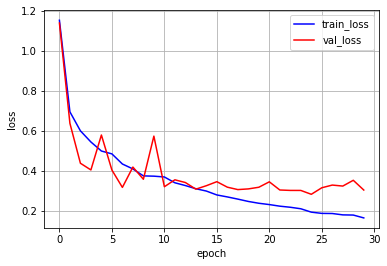

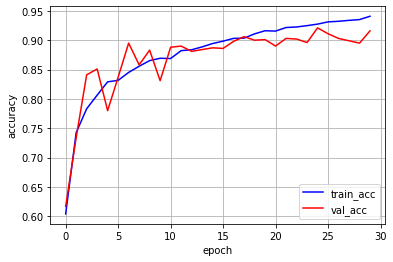

In [ ]:
# Loss & Accuracy
import matplotlib.pyplot as plt

# 学習用データの損失
plt.plot(history.history["loss"],
         color = "blue",
         label = "train_loss")
# 検証用データの損失
plt.plot(history.history["val_loss"],
         color = "red",
         label = "val_loss")
plt.legend(loc = "upper right")       # 凡例
plt.grid()                            # グリッド
plt.xlabel("epoch")                   # x軸
plt.ylabel("loss")                    # y軸
plt.show()

# 学習用データの正確度
plt.plot(history.history["accuracy"],
         color = "blue",
         label = "train_acc")
# 検証用データの損失
plt.plot(history.history["val_accuracy"],
         color = "red",
         label = "val_acc")
plt.legend(loc = "lower right")       # 凡例
plt.grid()                            # グリッド
plt.xlabel("epoch")                   # x軸
plt.ylabel("accuracy")                # y軸
plt.show()

畳み込み層（とバッチ正規化）をもう少し追加してみましょう。

In [ ]:
# ニューラルネットワークの構成----------------------------
# Neural Network
img_row = 28                # 入力層のユニット数
img_col = 28
unit_middle1 = 256          # 中間層のユニット数
unit_middle2 = 128
unit_output = 10            # 出力層のユニット数
learning_rate = 0.1         # 学習係数
epochs = 30                 # 学習を繰り返す回数（エポック数）
batch_size = 64             # ミニバッチのサイズ


# ニューラルネットワークの構築-----------------------------
# keras.modelsからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDenseとFlattenをインポート
from tensorflow.keras.layers import Dense, Flatten, Dropout     # Dropoutを追加
from tensorflow.keras.layers import Conv2D, MaxPooling2D        # MaxPooling2Dを追加
from tensorflow.keras.layers import BatchNormalization          # BatchNormalizationを追加
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 畳み込み層1
model.add(
    Conv2D(
        filters = 32,                   # フィルタの数
        kernel_size = (3, 3),           # フィルタのサイズ
        padding = "same",               # ゼロパディング
        input_shape = (img_row, img_col, 1),      # 入力データの形状
        activation = "relu"             # 活性化関数
    ))

# バッチ正規化1
model.add(
    BatchNormalization()
)

# 畳み込み層2
model.add(
    Conv2D(
        filters = 32,                   # フィルタの数
        kernel_size = (3, 3),           # フィルタのサイズ
        padding = "same",               # ゼロパディング
        activation = "relu"             # 活性化関数
    ))

# バッチ正規化2
model.add(
    BatchNormalization()
)

# プーリング層1(14, 14, 32)
model.add(
    MaxPooling2D(pool_size = (2, 2)))   # プーリングサイズ

# 畳み込み層3
model.add(
    Conv2D(
        filters = 64,                   # フィルタの数
        kernel_size = (3, 3),           # フィルタのサイズ
        padding = "same",               # ゼロパディング
        activation = "relu"             # 活性化関数
    ))

# バッチ正規化3
model.add(
    BatchNormalization()
)

# 畳み込み層4
model.add(
    Conv2D(
        filters = 64,                   # フィルタの数
        kernel_size = (3, 3),           # フィルタのサイズ
        padding = "same",               # ゼロパディング
        activation = "relu"             # 活性化関数
    ))

# バッチ正規化4
model.add(
    BatchNormalization()
)

# プーリング層2(7, 7, 64)
model.add(
    MaxPooling2D(pool_size = (2, 2)))   # プーリングサイズ


# (7, 7, 64) -> (3136)
model.add(Flatten())

# 中間層
model.add(Dense(unit_middle1, activation = "relu"))    # 中間層1
model.add(Dropout(0.5))                                # 中間層でドロップアウト
model.add(Dense(unit_middle2, activation = "relu"))    # 中間層2
model.add(Dropout(0.5))                                # 中間層でドロップアウト

# 出力層
model.add(Dense(unit_output, activation = "softmax"))

# モデルの概要を出力
model.summary()


# モデルのコンパイル---------------------------------
model.compile(
    optimizer = SGD(learning_rate),            # SGD
    loss = "categorical_crossentropy",         # 交差エントロピー誤差
    metrics = ["accuracy"]                     # 学習評価の指標はaccuracy
)


# 学習を実行し、結果を出力する
print(train_data1.shape, train_label1.shape)
print(valid_data1.shape, valid_label1.shape)
history = model.fit(train_data1,
                    train_label1,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data = (valid_data1, valid_label1)
)



# 検証-----------------------------------------------
# データ抽出
test_data0 = test_data[0:2000, : , : ]
test_label0 = test_label[0:2000]

# データ型
print(test_data0.dtype)
print(test_data0.shape)

# uint8 -> float32
test_data1 = test_data0.astype("float32") / 255

# データ型
print(test_data1.dtype)
print(test_data1.shape)

print("評価用データ")
print(test_data1.min(), "-", test_data1.max())
print(test_label0.min(), "-", test_label0.max())


# ラベルの表示
print("検証用", test_label0, len(test_label0))

# one-hot vector
test_label1 = to_categorical(test_label0)
print("検証用", test_label1, len(test_label1))


# 検証
score = model.evaluate(test_data1, test_label1, verbose = 1)
# 検証用データの誤り率
print("Test Loss : ", score[0])
# 検証用データの正確度
print("Test Accuracy : ", score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

損失関数の値、正確度を図示します。

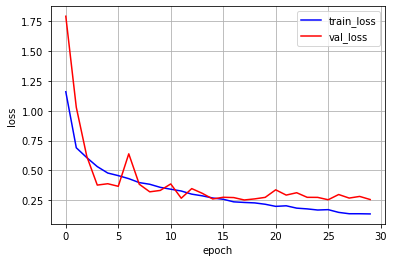

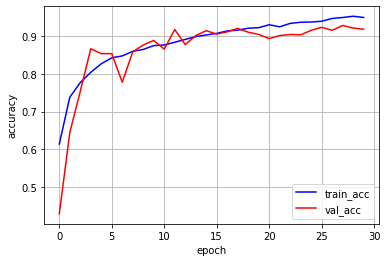

In [ ]:
# Loss & Accuracy
import matplotlib.pyplot as plt

# 学習用データの損失
plt.plot(history.history["loss"],
         color = "blue",
         label = "train_loss")
# 検証用データの損失
plt.plot(history.history["val_loss"],
         color = "red",
         label = "val_loss")
plt.legend(loc = "upper right")       # 凡例
plt.grid()                            # グリッド
plt.xlabel("epoch")                   # x軸
plt.ylabel("loss")                    # y軸
plt.show()

# 学習用データの正確度
plt.plot(history.history["accuracy"],
         color = "blue",
         label = "train_acc")
# 検証用データの損失
plt.plot(history.history["val_accuracy"],
         color = "red",
         label = "val_acc")
plt.legend(loc = "lower right")       # 凡例
plt.grid()                            # グリッド
plt.xlabel("epoch")                   # x軸
plt.ylabel("accuracy")                # y軸
plt.show()